In [12]:
import pickle as pkl
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load pickled data and pickled labels
data = pkl.load(open("data.pkl", "rb"))
labels = pkl.load(open("labels.pkl", "rb"))

In [3]:
#generates gaussian noise
def generate_noise(size = 300):
    return np.random.normal(loc = 0.0, scale = 1.0, size = size)

In [4]:
#count labels
#reminder: mapping = {"WK" : 0, "REM": 1, "N1": 2, "N2": 3, "N3" : 4}
label_count = np.bincount(labels)

#determine ratios of bins
ratios = label_count / labels.size
print(label_count)
print(ratios)

# -> need to at lest triple the amound of N1 data to get somewhat balanced classes. Ideally: Get all labels to same amount of data

[1023 1004  303 1709 1416]
[0.18753437 0.18405133 0.05554537 0.31329056 0.25957837]


In [6]:
n1_indices = np.where(labels == 2)

n1data = data[n1_indices]
n1data.shape


(303, 11, 300)

<function matplotlib.pyplot.show(close=None, block=None)>

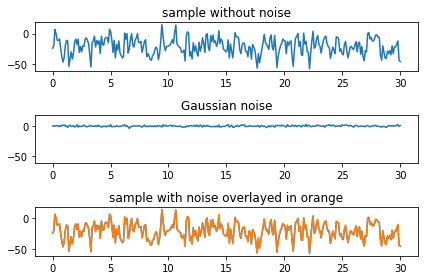

In [7]:
#plot sample data and noise over it
fig, axs = plt.subplots(3, sharey = True)


n1sample = n1data[0,0,:]
x = np.linspace(0,30,300)
axs[0].plot(x, n1sample)
axs[0].set_title("sample without noise")
#plt.show

noise = generate_noise()
axs[1].plot(x,noise)
axs[1].set_title("Gaussian noise")

axs[2].plot(x, n1sample)
axs[2].plot(x, n1sample + noise)
axs[2].set_title("sample with noise overlayed in orange")
fig.tight_layout()
plt.show


In [8]:
augmented_data = np.copy(data)
augmented_labels = np.copy(labels)
augmented_data.shape

(5455, 11, 300)

In [9]:
#generate noise for the n1 data three times and overlay with the data. then append to new array and create the corresponding labels

for n in range(3):
    new_array = np.zeros_like(n1data)
    for i in range(n1data.shape[0]):
        for j in range(n1data.shape[1]):
            new_array[i,j] = n1data[i,j] + generate_noise()
    augmented_data = np.concatenate((augmented_data, new_array))
    augmented_labels = np.concatenate((augmented_labels, np.ones(n1data.shape[0])*2)).astype(np.int32)



In [10]:
#now labels more balanced
np.bincount(augmented_labels)

array([1023, 1004, 1212, 1709, 1416])

In [13]:
#pickle the augmented data
pkl.dump(augmented_data, open(r"data_aug.pkl", "wb"))
pkl.dump(augmented_labels, open(r"labels_aug.pkl", "wb"))